# Exploring Your Data - Lab

## Introduction 

In this lab you'll perform an exploratory data analysis task, using statistical and visual EDA skills. You'll continue using the Lego dataset that you've acquired and cleaned in the previous labs. 

## Objectives
You will be able to:

* Check the distribution of various columns
* Examine the descriptive statistics of our dataset
* Create visualizations to help us better understand our dataset

## Data Exploration

At this point, you've already done a modest amount of data exploration between investigating the initial dataset to further exploring individual features while cleaning things up in preparation for modeling. During this process, you've become more familiar with the particular idiosyncrasies of the dataset. This gives you an opportunity to uncover difficulties and potential pitfalls in working with the dataset as well as potential avenues for feature engineering that could improve the predictive performance of your model down the line. Remember that this is also not a linear process; after building an initial model, you might go back and continue to mine the dataset for potential inroads to create additional features and improve the model's performance if initial results did not satisfy your needs and expectations. Here, you'll continue this process, investigating the distributions of some of the various features and their relationship to the target variable: `list_price`.

In the cells below: 

* Import `pandas` and set the standard alias. 
* Import `numpy` and set the standard alias. 
* Import `matplotlib.pyplot` and set the standard alias. 
* Import `seaborn` and set the alias `sns` (this is the standard alias for seaborn). 
* Use the ipython magic command to set all matplotlib visualizations to display inline in the notebook. 
* Load the dataset stored in the `'Lego_data_merged.csv'` file into a DataFrame, `df`. 
* Inspect the head of the DataFrame to ensure everything loaded correctly. 

In [2]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Describe the dataset using 5-point statistics. 

In [5]:
ls

CONTRIBUTING.md  index.ipynb  Lego_dataset_cleaned.csv  LICENSE.md  README.md


In [10]:
# Your code here
df = pd.read_csv('Lego_dataset_cleaned.csv')

- Use pandas to plot histograms for all the numeric variables in the dataset. 

In [20]:
# Your code here
lst = []
for col in df.columns:
    if df[col].dtype == 'float64':
        lst.append(col)
df2 = df.loc[:,lst]

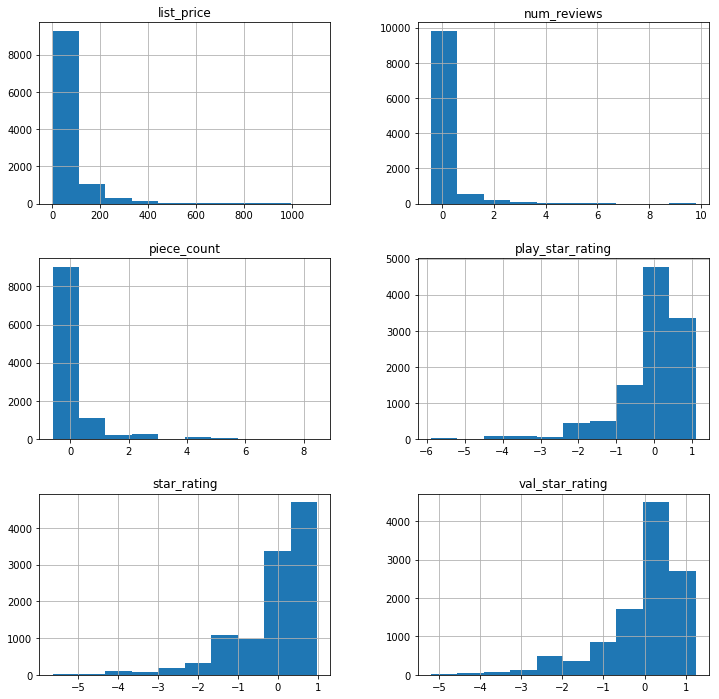

In [23]:
df2.hist(figsize=(12,12));

Note how skewed most of these distributions are. While linear regression does not assume that each of the individual predictors are normally distributed, it does assume a linear relationship between the predictors and the target variable (`list_price` in this case). To further investigate if this assumption holds true, you can plot some single variable regression plots of each feature against the target variable using `seaborn`. 

## Check for Linearity

Recall that one assumption in linear regression is that the target variable is linearly related to the input features. As shown in the previous lesson, you can use the `sns.jointplot()` function to investigate whether this relation holds true for the various predictors on hand.

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


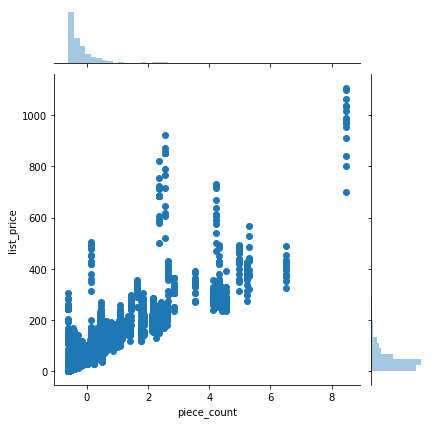

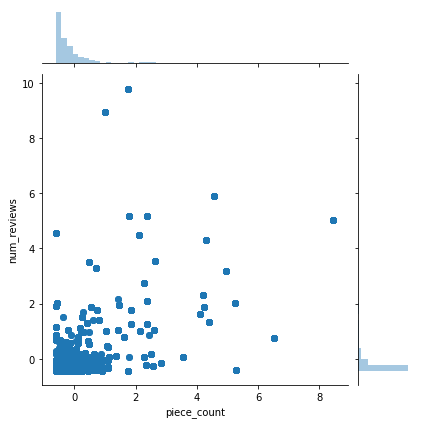

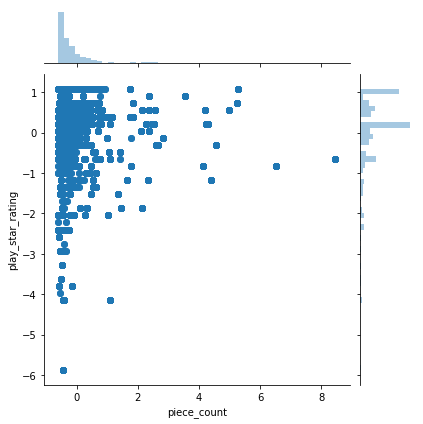

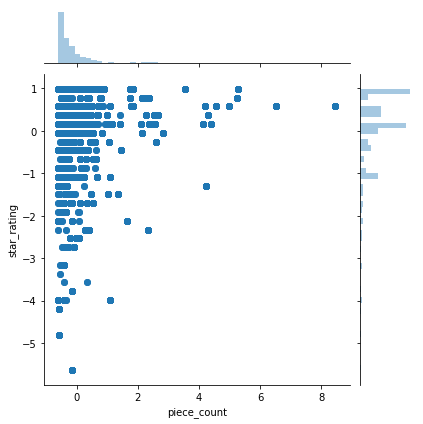

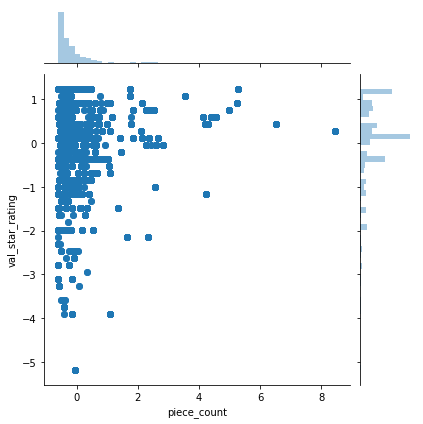

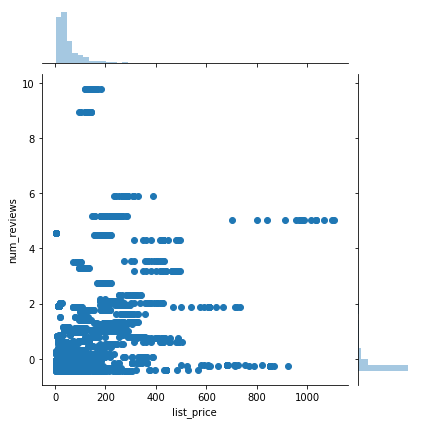

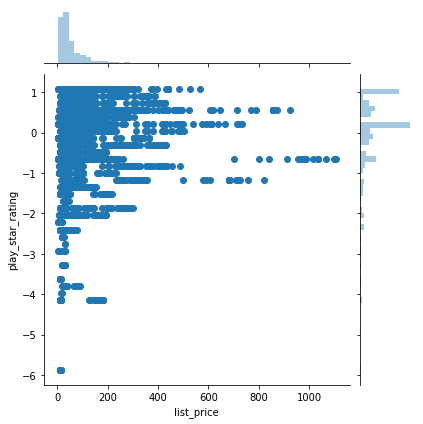

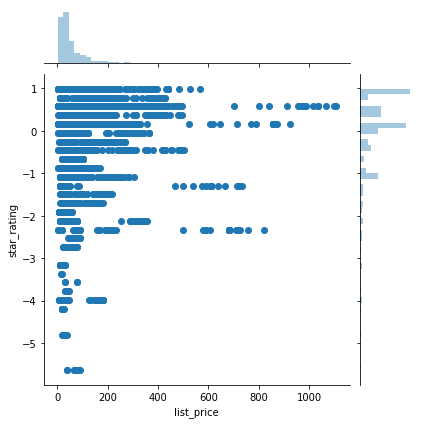

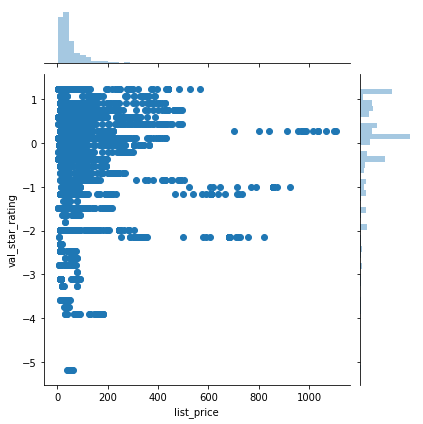

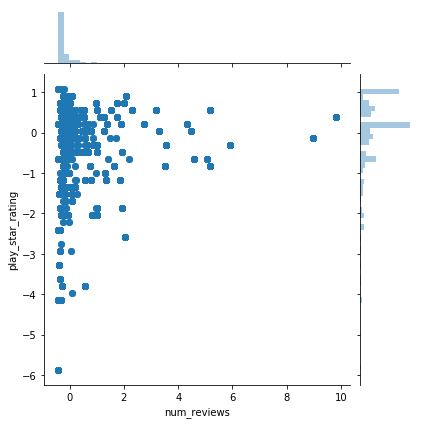

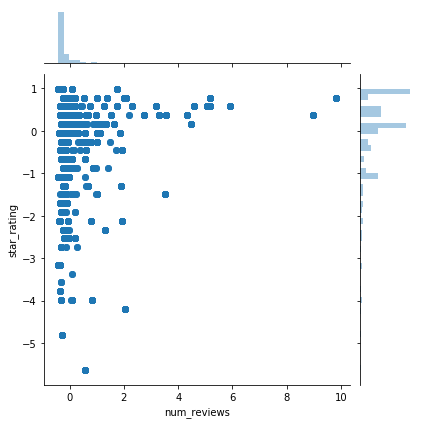

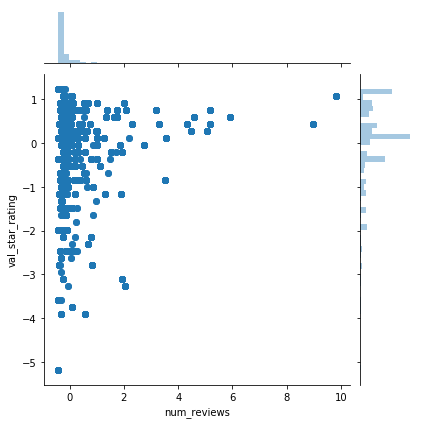

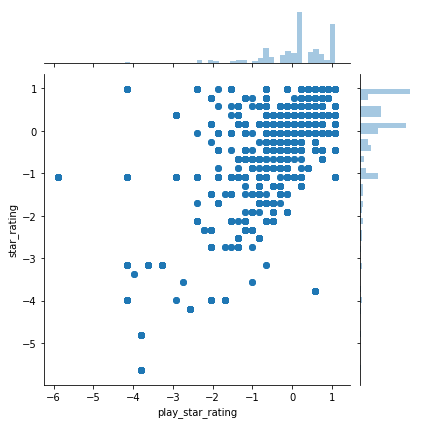

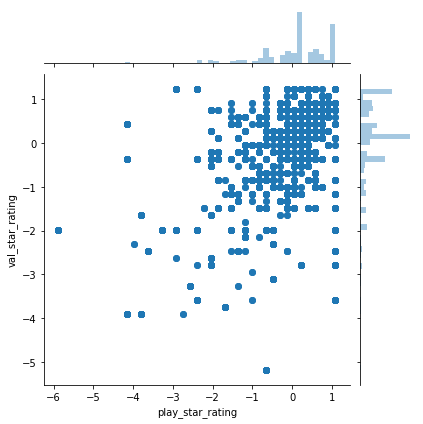

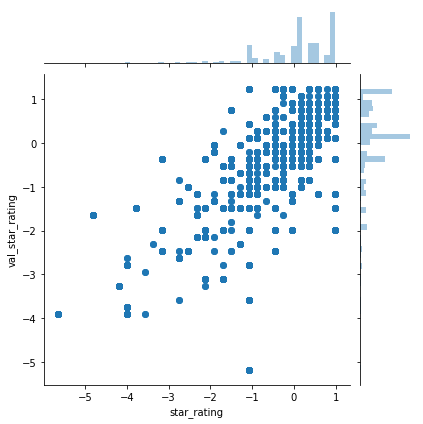

In [32]:
# Your code here
lst = []
for col in df2.columns:
    for col2 in df2.columns:
        if col !=col2:
            if col2 not in lst:
                sns.jointplot(col,col2,df2)
                plt.show()
    lst.append(col)

In [ ]:
# Your code here

In [ ]:
# Your code here

In [ ]:
# Your code here

In [ ]:
# Your code here

## Comments

Well, at first look it appears that the previous efforts in order to fill in the null review values proved of little value. Perhaps this was due to imputing the mean, but as it currently stands, each of the rating features seems to have little to no predictive power for the upcoming model.

## Checking for Multicollinearity

It's also important to make note of whether your predictive features will result in multicollinearity in the resulting model. While definitive checks for multicollinearity require analyzing the resulting model, predictors with overly high pairwise-correlation (r > .65) are almost certain to produce multicollinearity in a model. With that, take a minute to generate the pairwise (pearson) correlation coefficients of your predictive features and visualize these coefficients as a heatmap.

In [35]:
# Your code here
df2.corr()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating
piece_count,1.000000,0.865094,0.548783,-0.023281,0.055481,0.057313
list_price,0.865094,1.000000,0.445157,-0.013385,-0.015246,-0.062076
num_reviews,0.548783,0.445157,1.000000,-0.070892,-0.002466,0.020471
play_star_rating,-0.023281,-0.013385,-0.070892,1.000000,0.619044,0.485843
star_rating,0.055481,-0.015246,-0.002466,0.619044,1.000000,0.728203
val_star_rating,0.057313,-0.062076,0.020471,0.485843,0.728203,1.000000


In [ ]:
# Your code here

> Comments: The rating features show little promise for adding predictive power towards the `list_price`. This diminishes worry concerning their high correlation. That said, the two most promising predictors: `piece_count` and `num_reviews` also display fairly high correlation. Further analysis of an initial model will clearly be warranted.

## Further Resources

Have a look at following resources on how to deal with complex datasets that don't meet our initial expectations:  

- [What to Do When Bad Data Thwarts Machine Learning Success](https://towardsdatascience.com/what-to-do-when-bad-data-thwarts-machine-learning-success-fb82249aae8b)

- [Practical advice for analysis of large, complex data sets ](http://www.unofficialgoogledatascience.com/2016/10/practical-advice-for-analysis-of-large.html)

- [Data Cleaning Challenge: Scale and Normalize Data](https://www.kaggle.com/rtatman/data-cleaning-challenge-scale-and-normalize-data)

## Summary 

In this lesson you performed some initial EDA to check for regression assumptions. In the upcoming lessons, you'll continue to carry out a standard Data Science process and begin to fit and refine an initial model.